# 🔥 Part 14: Seaborn Heatmap Customization

**Goal:** Master the customization of `sns.heatmap()` to create a polished, publication-ready correlation matrix. This lesson is a deep dive into the most common and useful parameters.

---

### Key Learning Objectives
1.  Use `annot=True` and `fmt='.2f'` to add formatted numerical annotations.
2.  Control the color scheme using the `cmap` parameter (e.g., `'coolwarm'`, `'viridis'`).
3.  Set the color bar range using `vmin` and `vmax` to center the plot.
4.  Adjust the plot's appearance with `square=True` and `linewidths`.
5.  Combine all customizations to create a final, professional heatmap and export it.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set a Seaborn theme for all plots
sns.set_theme(style="whitegrid") 

print("🎯 LAB 14.1: ENVIRONMENT SETUP")
print("✅ Seaborn, Matplotlib, and pandas imported successfully!")

# Load or create Titanic sample data (Ensure this is available)
titanic_df = pd.DataFrame({
    'Age': [22, 38, 26, 35, 54, 2, 27, 14, 58, 20, 39, 55, 31, 25, 40, 66, 28, 42, 21, 18],
    'Fare': [7.25, 71.28, 7.92, 53.10, 51.86, 21.08, 11.13, 30.07, 26.55, 8.05, 31.0, 16.0, 26.0, 7.90, 227.52, 10.5, 26.0, 13.0, 7.74, 7.05],
    'Pclass': [3, 1, 3, 1, 1, 3, 3, 2, 1, 3, 1, 1, 2, 3, 1, 2, 2, 3, 3, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]
})

# We'll drop rows where 'Age' is missing for this analysis
titanic_df = titanic_df.dropna(subset=['Age'])

# Calculate the correlation matrix (same as Part 13)
numeric_cols = ['Age', 'Fare', 'Pclass', 'Survived']
corr_matrix = titanic_df[numeric_cols].corr(numeric_only=True)

print("✅ Titanic data and correlation matrix loaded.")

🎯 LAB 14.1: ENVIRONMENT SETUP
✅ Seaborn, Matplotlib, and pandas imported successfully!
✅ Titanic data and correlation matrix loaded.


## 1. Basic Heatmap (`sns.heatmap`)

This is the starting point from our last lesson. It creates a simple heatmap with a color bar.

🎯 LAB 14.2: Basic Heatmap



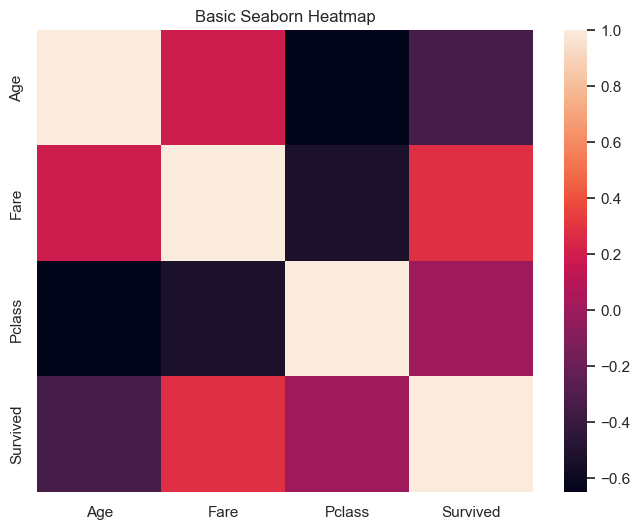

In [2]:
print("🎯 LAB 14.2: Basic Heatmap\n")

plt.figure(figsize=(8, 6))
ax = sns.heatmap(corr_matrix)
ax.set_title('Basic Seaborn Heatmap')
plt.show()

## 2. Adding Annotations (`annot` and `fmt`)

This is the most important step for a correlation matrix.
* `annot=True`: Automatically shows the data values in each cell.
* `fmt='.2f'`: Formats those annotations as floating-point numbers with 2 decimal places.

🎯 LAB 14.3: Heatmap with Annotations



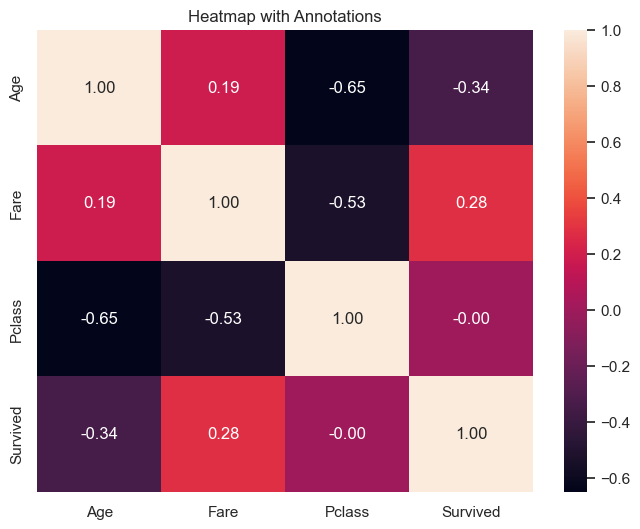


✅ `annot=True` replaces the complex Matplotlib for-loop.


In [3]:
print("🎯 LAB 14.3: Heatmap with Annotations\n")

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr_matrix,
    annot=True,  # Show the numbers
    fmt='.2f'    # Format to 2 decimals
)
ax.set_title('Heatmap with Annotations')
plt.show()

print("\n✅ `annot=True` replaces the complex Matplotlib for-loop.")

## 3. Changing the Color Map (`cmap`)

The `cmap` parameter controls the color scheme. For correlation, a **diverging** palette is best, as it shows positive and negative values in different colors and neutrals near zero.

* `'coolwarm'` (Red/Blue) and `'vlag'` (Red/Blue, but darker) are excellent choices.
* `'viridis'` (Green/Purple) is a good sequential palette.

🎯 LAB 14.4: Customizing Color Maps (cmap)



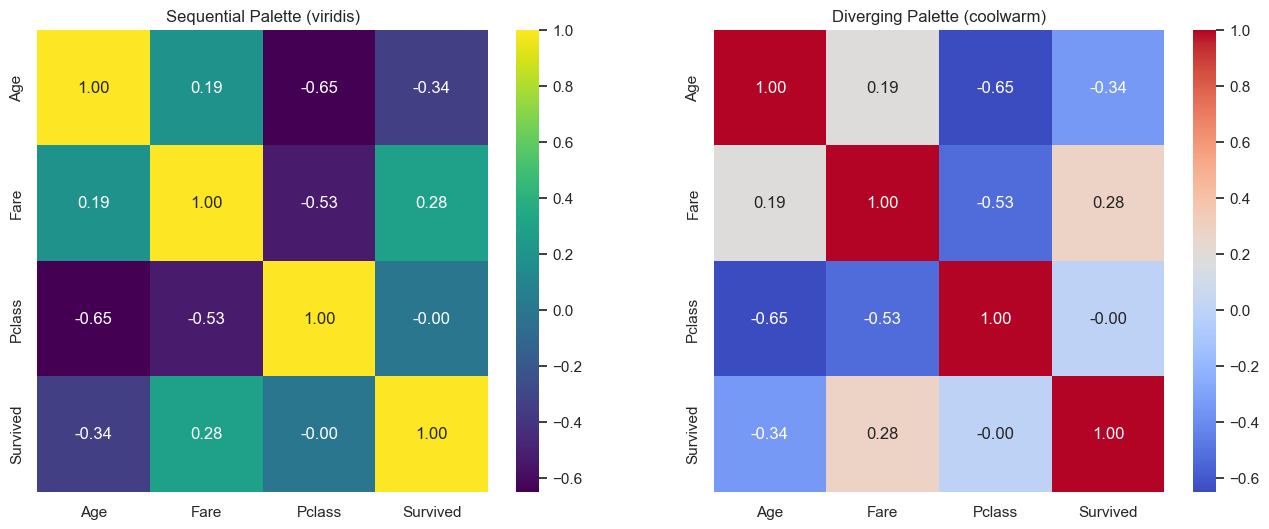


💡 A diverging palette like 'coolwarm' is better for correlation.


In [4]:
print("🎯 LAB 14.4: Customizing Color Maps (cmap)\n")

# Create a 1x2 grid to compare
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: 'viridis' (Sequential)
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='viridis', 
    ax=axes[0]
)
axes[0].set_title('Sequential Palette (viridis)')

# Plot 2: 'coolwarm' (Diverging)
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    ax=axes[1]
)
axes[1].set_title('Diverging Palette (coolwarm)')

plt.show()

print("\n💡 A diverging palette like 'coolwarm' is better for correlation.")

## 4. Final Polish (`vmin`/`vmax`, `square`, `linewidths`)

We can add a few more parameters to make the heatmap look perfect:

* `vmin=-1, vmax=1`: This forces the color bar to range from -1 to +1. This is crucial for correlation, as it correctly centers 0 (white on the 'coolwarm' map).
* `square=True`: Makes each cell a perfect square, which is the standard for heatmaps.
* `linewidths=0.5`: Adds a thin line between each cell for better separation.

🎯 LAB 14.5: Adding Final Polish



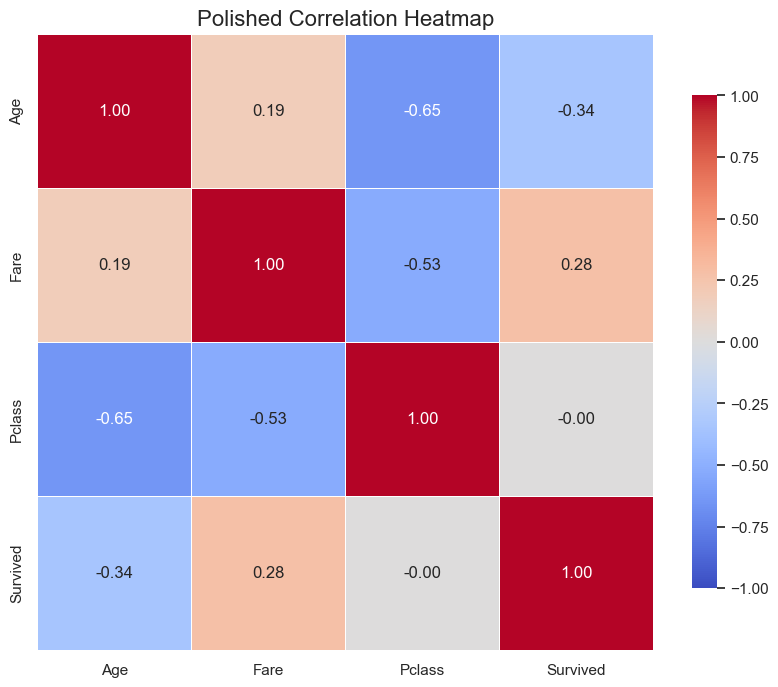

In [5]:
print("🎯 LAB 14.5: Adding Final Polish\n")

plt.figure(figsize=(10, 8))

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,         # Force color bar minimum to -1
    vmax=1,         # Force color bar maximum to +1
    square=True,     # Make cells square
    linewidths=0.5,  # Add thin lines between cells
    cbar_kws={"shrink": .8} # Make the color bar slightly smaller
)

ax.set_title('Polished Correlation Heatmap', fontsize=16)
plt.show()

## 5. Practice Project: Final Heatmap & Insights

This cell combines everything into our final, "gold-standard" correlation heatmap and includes the `savefig()` command to export it.

🎯 LAB 14.6: PRACTICE PROJECT - Final Plot & Export

💾 Plot saved as 'seaborn_part14_heatmap_report.png'


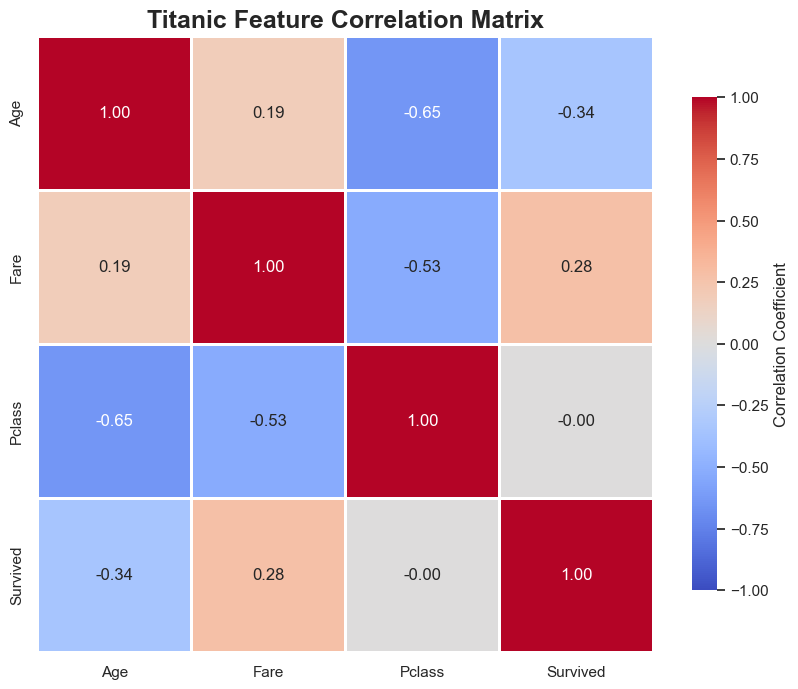


📊 What the heatmap shows:

Strongest correlations with Survival:
🟢 Fare      : +0.28
🔴 Pclass    : -0.00
🔴 Age       : -0.34

💡 Reading the heatmap:
• Bright red = Strong positive correlation (+1)
• White = No correlation (0)
• Bright blue = Strong negative correlation (-1)

🎉 Part 14 Complete! You can make beautiful heatmaps!


In [6]:
print("🎯 LAB 14.6: PRACTICE PROJECT - Final Plot & Export\n")

# 1. Set the theme
sns.set_theme(style="whitegrid") # Use whitegrid for a clean background

# 2. Create the figure
plt.figure(figsize=(10, 8))

# 3. Create the plot with all customizations
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=1.0,
    linecolor='white', # Use white lines for a clean grid on the grid background
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"}
)

# 4. Final Customizations
ax.set_title('Titanic Feature Correlation Matrix', fontsize=18, fontweight='bold')

# 5. Save and Show
try:
    fig = ax.get_figure() # Get the figure from the axes
    fig.savefig(
        'seaborn_part14_heatmap_report.png', 
        dpi=300, 
        bbox_inches='tight'
    )
    print("💾 Plot saved as 'seaborn_part14_heatmap_report.png'")
except Exception as e:
    print(f"❌ Error saving plot: {e}")

plt.show()

# 6. Print Summary Insights
print("\n📊 What the heatmap shows:")
print("\nStrongest correlations with Survival:")
survival_series = corr_matrix['Survived'].drop('Survived').sort_values(ascending=False)
for feature, val in survival_series.items():
    color = "🟢" if val > 0 else "🔴"
    print(f"{color} {feature:10}: {val:+.2f}")

print("\n💡 Reading the heatmap:")
print("• Bright red = Strong positive correlation (+1)")
print("• White = No correlation (0)")
print("• Bright blue = Strong negative correlation (-1)")

print("\n🎉 Part 14 Complete! You can make beautiful heatmaps!")